In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglog import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretraining import LogLineEncoder, LogSeqEncoder, LogClassifier
from oclog.openset.openset import OpenSet
from oclog.openset.opensetv2 import OpenSet as osetv2

In [3]:
bglog = BGLog(save_padded_num_sequences=False, load_from_pkl=True, )
train_test = bglog.get_tensor_train_test(ablation=1000)
train_data, test_data = train_test

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_padded_num_seq_df.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltk.pkl
train_0:, 800
test_0:, 200
train_1:, 800
test_1:, 200
train_2:, 800
test_2:, 200
train_3:, 800
test_3:, 102
4 class does not have 800 records, it has only 628 records
test_4:, 0
5 class does not have 800 records, it has only 165 records
5 class does not have 200 records, it has only 165 records
6 class does not have 800 records, it has only 75 records
6 class does not have 200 records, it has only 75 records
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]]
<BatchDataset element_spec=(TensorSpec(shape=(32, 32, 64), dtype=tf.int32, name=None), TensorSpec(shape=(32, 4), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(32, 32, 64), dtype=tf.int32, name=None), TensorSpec(shape=(32, 4), dtype=tf.float32, name=None))>


In [4]:
line_encoder = LogLineEncoder(bglog, chars_in_line=64)
logSeqencer =  LogSeqEncoder(line_in_seq=32)
ptmodel = LogClassifier(line_encoder=line_encoder, seq_encoder=logSeqencer, num_classes=4)
ptmodel.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
hist = ptmodel.fit(train_data, validation_data=test_data, epochs=5) 

vocab_size: 50
Epoch 1/5
100/100 [==============================] - 11s 99ms/step - loss: 0.4636 - accuracy: 0.8128 - precision: 0.8919 - recall: 0.7347 - val_loss: 0.0431 - val_accuracy: 0.9866 - val_precision: 0.9896 - val_recall: 0.9866
Epoch 2/5
100/100 [==============================] - 10s 96ms/step - loss: 0.0713 - accuracy: 0.9787 - precision: 0.9787 - recall: 0.9772 - val_loss: 0.0142 - val_accuracy: 0.9955 - val_precision: 0.9970 - val_recall: 0.9940
Epoch 3/5
100/100 [==============================] - 10s 96ms/step - loss: 0.0291 - accuracy: 0.9884 - precision: 0.9884 - recall: 0.9881 - val_loss: 0.0034 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/5
100/100 [==============================] - 10s 96ms/step - loss: 0.0234 - accuracy: 0.9922 - precision: 0.9922 - recall: 0.9912 - val_loss: 0.0047 - val_accuracy: 0.9985 - val_precision: 0.9985 - val_recall: 0.9985
Epoch 5/5
100/100 [==============================] - 10s 96ms/step - loss: 0.0085 - a

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 1/50, train_loss: 5.844631195068359


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 2/50, train_loss: 5.844644546508789


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 3/50, train_loss: 5.844634532928467


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 4/50, train_loss: 5.844609260559082


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 5/50, train_loss: 5.844616889953613


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 6/50, train_loss: 5.844614028930664


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 7/50, train_loss: 5.844615936279297


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 8/50, train_loss: 5.844618320465088


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 9/50, train_loss: 5.844632148742676


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 10/50, train_loss: 5.844623565673828


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 11/50, train_loss: 5.844614028930664


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 12/50, train_loss: 5.8446149826049805


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 13/50, train_loss: 5.844630718231201


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 14/50, train_loss: 5.844623565673828


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.26it/s]


epoch: 15/50, train_loss: 5.844608306884766


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.20it/s]


epoch: 16/50, train_loss: 5.8446044921875


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.24it/s]


epoch: 17/50, train_loss: 5.844630241394043


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 18/50, train_loss: 5.844622611999512


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.42it/s]


epoch: 19/50, train_loss: 5.844620227813721


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.42it/s]


epoch: 20/50, train_loss: 5.844625473022461


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


epoch: 21/50, train_loss: 5.8446245193481445


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


epoch: 22/50, train_loss: 5.844609260559082


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


epoch: 23/50, train_loss: 5.844626426696777


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.42it/s]


epoch: 24/50, train_loss: 5.844618320465088


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


epoch: 25/50, train_loss: 5.844629287719727


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 26/50, train_loss: 5.844630718231201


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 27/50, train_loss: 5.844624042510986


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 28/50, train_loss: 5.844613075256348


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 29/50, train_loss: 5.844629287719727


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 30/50, train_loss: 5.844613075256348


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 31/50, train_loss: 5.844626426696777


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


epoch: 32/50, train_loss: 5.844615936279297


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 33/50, train_loss: 5.844625473022461


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 34/50, train_loss: 5.844611167907715


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 35/50, train_loss: 5.844624042510986


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 36/50, train_loss: 5.844618320465088


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 37/50, train_loss: 5.844634532928467


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.31it/s]


epoch: 38/50, train_loss: 5.844625473022461


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.40it/s]


epoch: 39/50, train_loss: 5.844630241394043


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 40/50, train_loss: 5.844616889953613


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 41/50, train_loss: 5.84463357925415


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.57it/s]


epoch: 42/50, train_loss: 5.8446245193481445


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.60it/s]


epoch: 43/50, train_loss: 5.8446269035339355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.58it/s]


epoch: 44/50, train_loss: 5.8446245193481445


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.59it/s]


epoch: 45/50, train_loss: 5.844615459442139


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.56it/s]


epoch: 46/50, train_loss: 5.844634532928467


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.57it/s]


epoch: 47/50, train_loss: 5.844621181488037


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.57it/s]


epoch: 48/50, train_loss: 5.844627857208252


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.57it/s]


epoch: 49/50, train_loss: 5.844632148742676


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.57it/s]


epoch: 50/50, train_loss: 5.8446173667907715


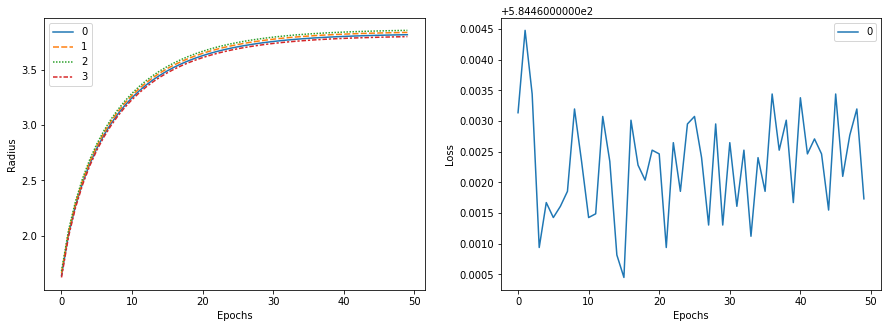

([<tf.Tensor: shape=(), dtype=float32, numpy=584.46313>,
  <tf.Tensor: shape=(), dtype=float32, numpy=584.4645>,
  <tf.Tensor: shape=(), dtype=float32, numpy=584.46344>,
  <tf.Tensor: shape=(), dtype=float32, numpy=584.46094>,
  <tf.Tensor: shape=(), dtype=float32, numpy=584.4617>,
  <tf.Tensor: shape=(), dtype=float32, numpy=584.4614>,
  <tf.Tensor: shape=(), dtype=float32, numpy=584.4616>,
  <tf.Tensor: shape=(), dtype=float32, numpy=584.46185>,
  <tf.Tensor: shape=(), dtype=float32, numpy=584.4632>,
  <tf.Tensor: shape=(), dtype=float32, numpy=584.46234>,
  <tf.Tensor: shape=(), dtype=float32, numpy=584.4614>,
  <tf.Tensor: shape=(), dtype=float32, numpy=584.4615>,
  <tf.Tensor: shape=(), dtype=float32, numpy=584.4631>,
  <tf.Tensor: shape=(), dtype=float32, numpy=584.46234>,
  <tf.Tensor: shape=(), dtype=float32, numpy=584.4608>,
  <tf.Tensor: shape=(), dtype=float32, numpy=584.46045>,
  <tf.Tensor: shape=(), dtype=float32, numpy=584.463>,
  <tf.Tensor: shape=(), dtype=float32, num

In [5]:
# oset = OpenSet(4, ptmodel) 
oset = osetv2(4, ptmodel)
oset.train(train_data, epochs=50, lr_rate = 1)
# print(oset.radius_changes[0], oset.radius_changes[len(oset.radius_changes)-1])
# print(oset.openpredict(oset.features))

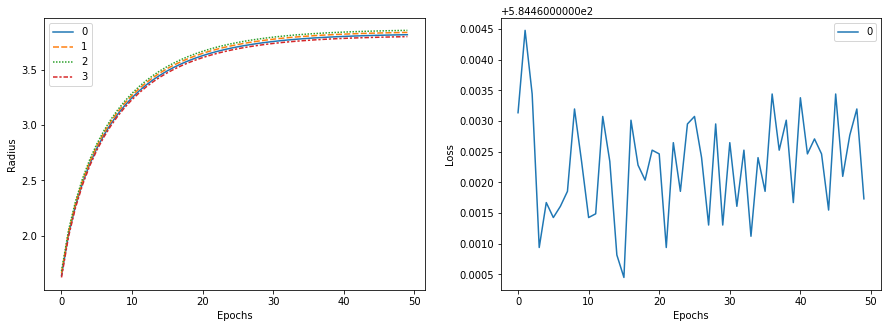

<tf.Variable 'boundary_loss/Variable:0' shape=(4, 1) dtype=float32, numpy=
array([[1.6401937],
       [1.6608899],
       [1.6794803],
       [1.6225598]], dtype=float32)> <tf.Variable 'boundary_loss/Variable:0' shape=(4, 1) dtype=float32, numpy=
array([[3.8160396],
       [3.8367524],
       [3.8553295],
       [3.798409 ]], dtype=float32)>
euc_dis: tf.Tensor(
[13.799753    7.7045937  11.938675   12.855525    2.1357417   8.0044
 12.512034    2.6646109   9.54055     0.62612736  4.7268424   3.0176616
  7.142834    1.743036    2.251812    2.7918844  11.609283    9.7233
  7.2805996   8.950837   12.108105    2.7918844  11.618418    3.066754
 11.056401    7.011066   23.07774     3.3440876   5.4137926   4.83005
  4.8647842   7.2263985 ], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[3.8367524 3.798409  3.8367524 3.8367524 3.798409  3.798409  3.798409
 3.8160396 3.8367524 3.8553295 3.798409  3.8160396 3.798409  3.798409
 3.8553295 3.8553295 3.8367524 3.8367524 3.8553295 3.8553295 3.836

In [6]:
oset.plot_radius_chages()
print(oset.radius_changes[0], oset.radius_changes[len(oset.radius_changes)-1])
preds = oset.openpredict(oset.features)

In [9]:
oset.evaluate(train_data)

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]


NameError: name 'features' is not defined